In [6]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

Sample shape:  (28, 28)


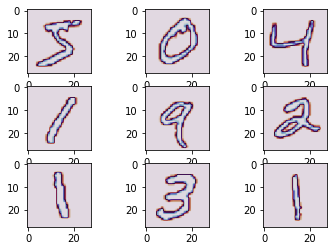

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.array(X_train)/255
y_train = np.array(y_train)
X_test = np.array(X_test)/255
y_test = np.array(y_test)

print("Sample shape: ",X_train[0].shape)

for i in range(0,9):
    plt.subplot(3,3,1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('twilight_r'))
plt.show()

In [8]:
from tensorflow import keras
from keras.layers import Input,Dense,Dropout,Flatten
from keras import metrics, Model

def create_model(lr,drop):
    inp = Input(shape = (28,28),name = "input")
    
    x = Flatten(input_shape=(28,28),name = "flatten")(inp)
    
    x = Dense(units = 32, activation="relu")(x)
    
    x = Dropout(drop, name = "dropout")(x)
    
    x = Dense(units = 10, activation="softmax",name="output")(x)
    
    optimizer = keras.optimizers.Adam(learning_rate = lr)
    loss = "sparse_categorical_crossentropy"
    
    model = Model(inp,x, name = "digit_detector")
    model.compile(
        optimizer = optimizer,
        loss = loss,
        metrics = [
            # metrics.CategoricalAccuracy()
            "accuracy"
        ]
    )
    return model

def train_model(model,x,y,epochs,batch_size,validation_split):
    history = model.fit(
        x = x,
        y = y,
        epochs = epochs,
        batch_size = batch_size,
        shuffle = True,
        validation_split = validation_split
    )
    
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    
    return epochs, hist

def plot_output(epochs,hist,list_of_metrics):
    plt.figure(figsize=(10,5))
    plt.xlabel("Epoch")
    plt.ylabel("Value")

    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)

    plt.legend()

In [9]:
learning_rate =  0.003
dropout = 0.2
batch_size = 1024
epochs = 50
validation_split = 0.2
model = create_model(learning_rate,dropout)
epochs, hist = train_model(model,X_train,y_train,epochs,batch_size,validation_split)

plot_output(epochs,hist,["accuracy","loss","val_accuracy","val_loss"])

Epoch 1/50
47/47 [==============================] - 2s 36ms/step - loss: 1.4590 - accuracy: 0.5334 - val_loss: 0.3936 - val_accuracy: 0.8934
Epoch 2/50
47/47 [==============================] - 0s 8ms/step - loss: 0.4844 - accuracy: 0.8570 - val_loss: 0.2923 - val_accuracy: 0.9203
Epoch 3/50
47/47 [==============================] - 0s 10ms/step - loss: 0.3832 - accuracy: 0.8881 - val_loss: 0.2525 - val_accuracy: 0.9299
Epoch 4/50
47/47 [==============================] - 0s 9ms/step - loss: 0.3364 - accuracy: 0.9024 - val_loss: 0.2283 - val_accuracy: 0.9358
Epoch 5/50
47/47 [==============================] - 1s 12ms/step - loss: 0.3022 - accuracy: 0.9114 - val_loss: 0.2122 - val_accuracy: 0.9394
Epoch 6/50
47/47 [==============================] - 1s 15ms/step - loss: 0.2772 - accuracy: 0.9178 - val_loss: 0.1992 - val_accuracy: 0.9442
Epoch 7/50
47/47 [==============================] - 1s 13ms/step - loss: 0.2594 - accuracy: 0.9237 - val_loss: 0.1895 - val_accuracy: 0.9461
Epoch 8/50
47/4

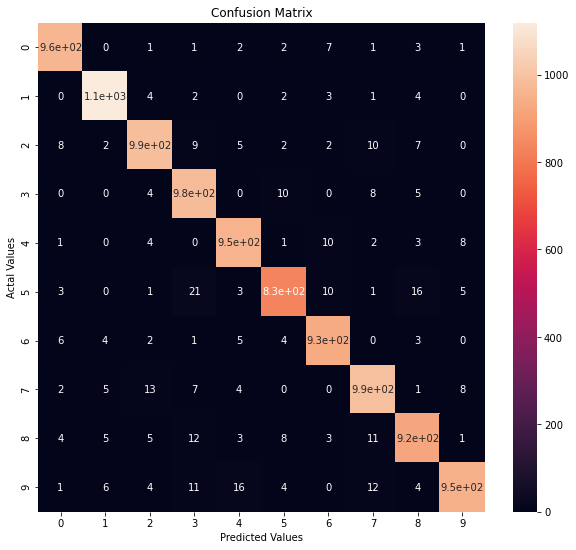

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions_softmax = model.predict(X_test)
predictions = [np.argmax(i) for i in predictions_softmax]

cm = pd.DataFrame(confusion_matrix(y_test,predictions))
plt.figure(figsize=(10,9))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
model.save("./detector")

INFO:tensorflow:Assets written to: ./detector\assets
